In [3]:
from epyr.state import State
from epyr.circuit import Circuit
import timeit
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
def n_qubit_entanglement(N):
    c = Circuit(N)
    s = State(N)
    c.h(0)
    for i in range(1, N):
        c.cnot(0, i)

    c.compute(s)

In [13]:
N_MAX = 20
times = []
for N in range(1, N_MAX):
    times.append(timeit.timeit(lambda: n_qubit_entanglement(N), number=1))

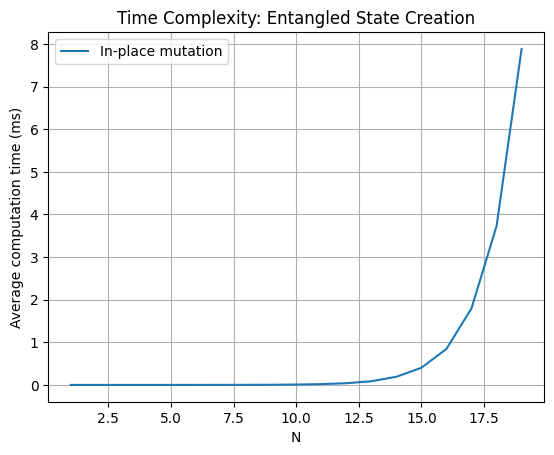

In [14]:
plt.plot(range(1, N_MAX), times, label="In-place mutation")
plt.title("Time Complexity: Entangled State Creation")
plt.xlabel("N")
plt.ylabel("Average computation time (ms)")
plt.legend()
plt.grid()